# Principal Component Analysis (PCA)

We will use Wisconsin Breast Cancer dataset, which records clinical measurements of breast cancer tumors. Each tumor
is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
import seaborn as sns; sns.set()

In [2]:
cancer.data.shape

(569, 30)

In [3]:
cancer.target_names

array(['malignant', 'benign'], 
      dtype='<U9')

We create a histogram for each of the features, counting how often a data point
appears with a feature in a certain range (called a bin). Each plot overlays two histograms,
one for all of the points in the benign class (blue) and one for all the points in
the malignant class (red).

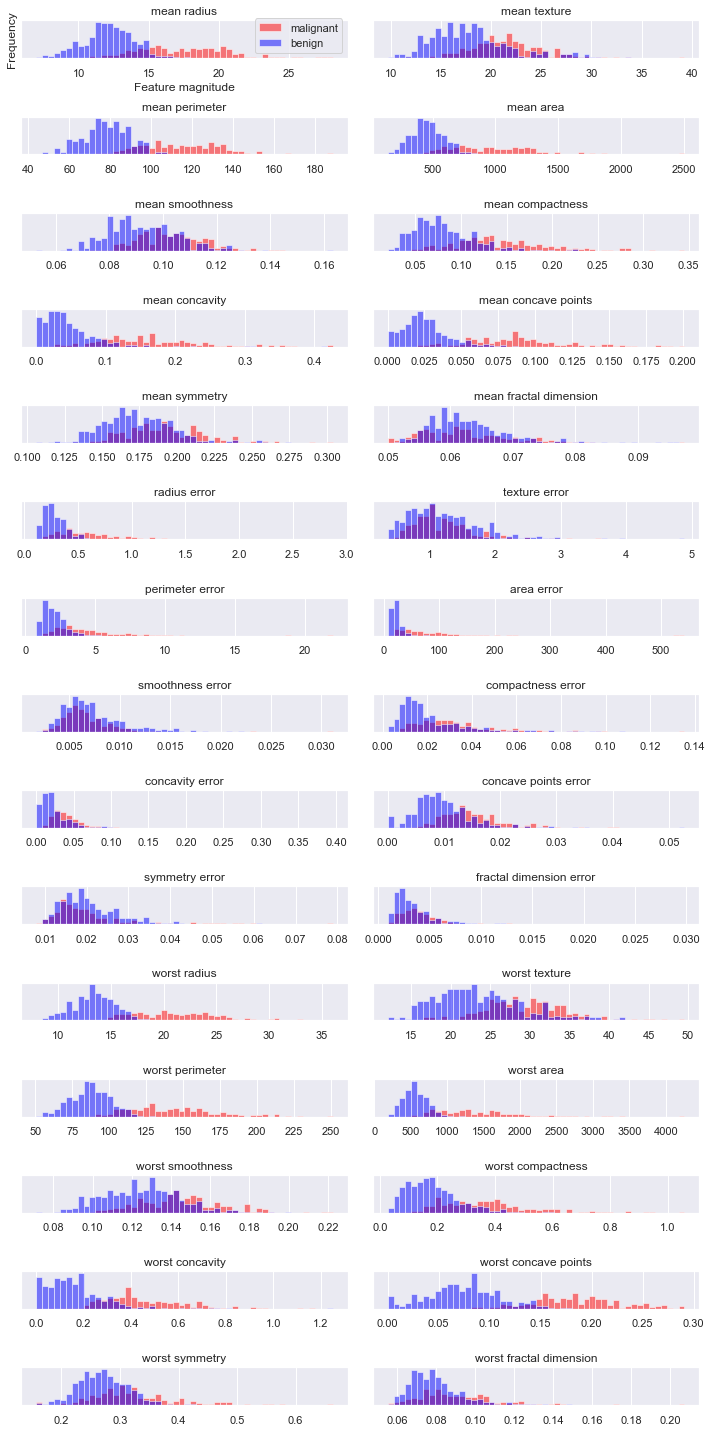

In [4]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='red', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='blue', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[0].set_xlabel("Feature magnitude")
    ax[0].set_ylabel("Frequency")
    ax[0].legend(["malignant", "benign"], loc="best")
    fig.tight_layout()

This gives us some idea of how each feature is distributed
across the two classes, and allows us to venture a guess as to which features are better
at distinguishing malignant and benign samples. For example, the feature “smoothness
error” seems quite uninformative, because the two histograms mostly overlap,
while the feature “worst concave points” seems quite informative, because the histograms
are quite disjoint.

### Rescale the data data using Standard Scalar

In [5]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation. We instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and dimensionality reduction
by calling transform. By default, PCA only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object.

#### Keep the first two principal components of the data

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [13]:
pca.explained_variance_ratio_

array([ 0.44272026,  0.18971182])

#### Fit PCA model to breast cancer data

In [7]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Transform data onto the first two principal components

In [8]:
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


### Plot first vs. second principal component, colored by class

In [9]:
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['PC1','PC2']
X_pca['Target'] = cancer.target
X_pca['Target'] = np.where(X_pca['Target']==1, 'Benign','Malignant')

Text(0,0.5,'Second principal component')

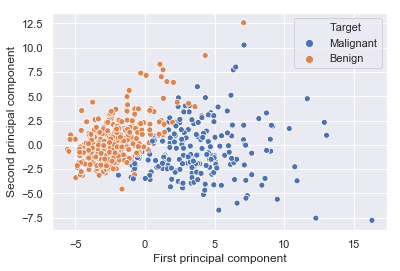

In [10]:
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=X_pca)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")